In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ln_utils import *
import os

In [3]:
%matplotlib inline

# Load data parts

#### From 2019-01-10 -> 2019-01-31

In [4]:
graph_files = ["../LNdata/snapshots/lngraph_2019_01_%i__12_00.json" % i for i in range(10,32)]

#### From 2019-02-02 -> 2019-03-18

In [5]:
data_dir = "../LNdata/lncaptures/lngraph/2019/"
graph_files +=  [data_dir + f for f in sorted(os.listdir("../LNdata/lncaptures/lngraph/2019/")) if ".json" in f]

#### From 2019-03-19 -> 2019-03-29

In [6]:
data_dir = "../LNdata/"
graph_files += [data_dir + f for f in sorted(os.listdir("../LNdata/")) if ".json" in f][5:]

graph_files

In [7]:
nodes, edges = load_temp_data(graph_files[:-1])
print(len(nodes), len(edges))

../LNdata/snapshots/lngraph_2019_01_10__12_00.json 1742 10355
../LNdata/snapshots/lngraph_2019_01_11__12_00.json 446 8260
../LNdata/snapshots/lngraph_2019_01_12__12_00.json 411 8654
../LNdata/snapshots/lngraph_2019_01_13__12_00.json 350 8797
../LNdata/snapshots/lngraph_2019_01_14__12_00.json 380 9198
../LNdata/snapshots/lngraph_2019_01_15__12_00.json 548 9551
../LNdata/snapshots/lngraph_2019_01_16__12_00.json 443 9968
../LNdata/snapshots/lngraph_2019_01_17__12_00.json 416 10234
../LNdata/snapshots/lngraph_2019_01_18__12_00.json 360 10157
../LNdata/snapshots/lngraph_2019_01_19__12_00.json 389 10770
../LNdata/snapshots/lngraph_2019_01_20__12_00.json 377 10971
../LNdata/snapshots/lngraph_2019_01_21__12_00.json 419 10835
../LNdata/snapshots/lngraph_2019_01_22__12_00.json 520 11481
../LNdata/snapshots/lngraph_2019_01_23__12_00.json 487 11629
../LNdata/snapshots/lngraph_2019_01_24__12_00.json 434 11737
../LNdata/snapshots/lngraph_2019_01_25__12_00.json 432 11141
../LNdata/snapshots/lngraph_2

In [8]:
edges = edges.sort_values("last_update")

#### We have some very old timestamp

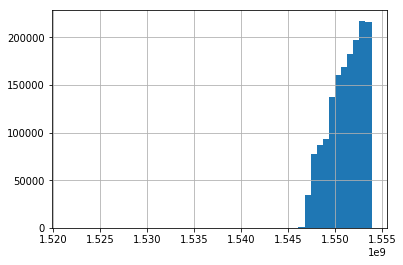

In [9]:
edges["last_update"].hist(bins=50)

In [10]:
len(nodes), len(edges)

(44541, 1572899)

### Data collection time interval:

In [11]:
MIN_TIME = 1547082001 #Thursday, January 10, 2019 1:00:01 AM
MAX_TIME = 1553947199 # Saturday, March 30, 2019 11:59:59 AM

In [12]:
nodes = nodes[(nodes["last_update"] > MIN_TIME) & (nodes["last_update"] < MAX_TIME)]
edges = edges[(edges["last_update"] > MIN_TIME) & (edges["last_update"] < MAX_TIME)]
len(nodes), len(edges)

(43019, 1565745)

#### We have missing data from 2019-02-01 -> from 2019-02-02

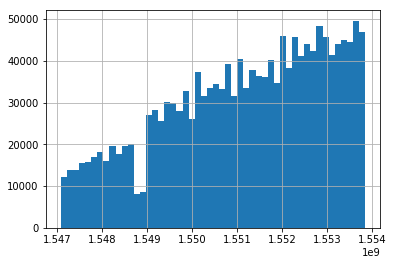

In [13]:
edges["last_update"].hist(bins=50)

In [14]:
edges.to_csv("../LNdata/edge_last_updates.csv", index=False)